In [33]:
import pandas as pd
print("Hello, Recommendation System!")

Hello, Recommendation System!


In [34]:
# Load data
movies = pd.read_csv("../data/raw/movies.csv")
ratings = pd.read_csv("../data/raw/ratings.csv")

# Check first 5 rows
print("Movies:")
display(movies.head())

print("\nRatings:")
display(ratings.head())

# Check missing values
print("\nMissing values in movies:", movies.isnull().sum())
print("Missing values in ratings:", ratings.isnull().sum())

Movies:


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy



Ratings:


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931



Missing values in movies: movieId    0
title      0
genres     0
dtype: int64
Missing values in ratings: userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


Dataset Overview 

In [35]:
print("Number of unique users:", ratings['userId'].nunique())
print("Number of unique movies:", ratings['movieId'].nunique())
print("Total ratings:", len(ratings))
print("Ratings distribution:")
display(ratings['rating'].value_counts().sort_index())


Number of unique users: 610
Number of unique movies: 9724
Total ratings: 100836
Ratings distribution:


rating
0.5     1370
1.0     2811
1.5     1791
2.0     7551
2.5     5550
3.0    20047
3.5    13136
4.0    26818
4.5     8551
5.0    13211
Name: count, dtype: int64

Visualize Ratings Distribution 

/var/folders/_5/86kkzmcd23g8tgn_xvvl1pl80000gn/T/ipykernel_787/1962102107.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=ratings, x='rating', palette='viridis')


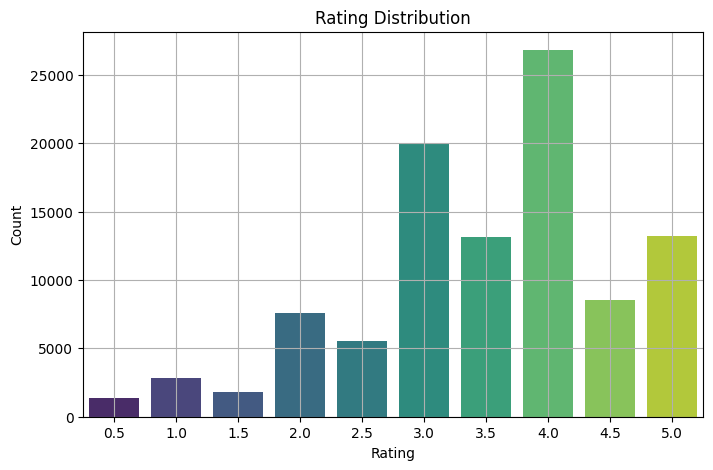

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(data=ratings, x='rating', palette='viridis')
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.grid(True)
plt.show()


User and Movie Activity

Average ratings per user: 165.30491803278687


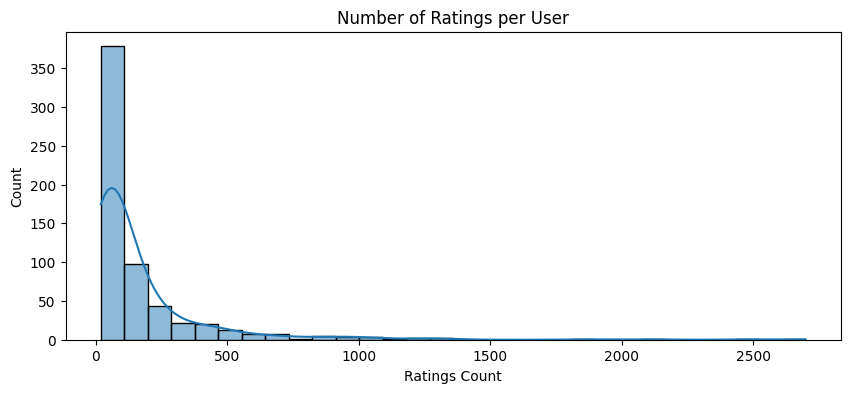

Average ratings per movie: 10.369806663924312


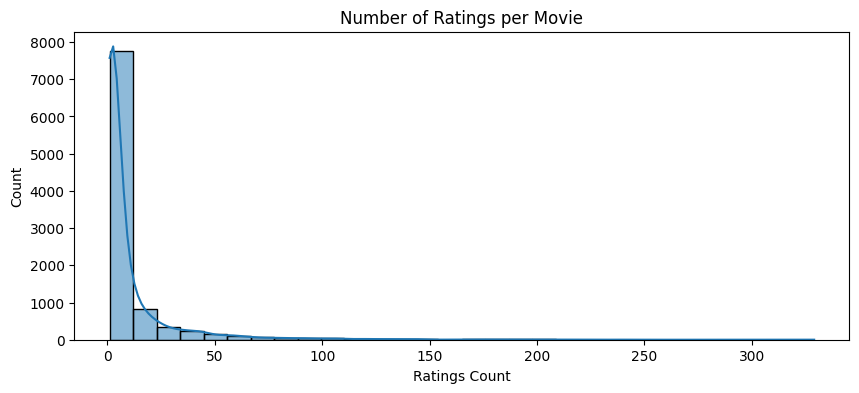

In [39]:
# Ratings per user
ratings_per_user = ratings.groupby('userId').size()
print("Average ratings per user:", ratings_per_user.mean())

plt.figure(figsize=(10, 4))
sns.histplot(ratings_per_user, bins=30, kde=True)
plt.title("Number of Ratings per User")
plt.xlabel("Ratings Count")
plt.show()

# Ratings per movie
ratings_per_movie = ratings.groupby('movieId').size()
print("Average ratings per movie:", ratings_per_movie.mean())

plt.figure(figsize=(10, 4))
sns.histplot(ratings_per_movie, bins=30, kde=True)
plt.title("Number of Ratings per Movie")
plt.xlabel("Ratings Count")
plt.show()


Merge Movies with Ratings

In [45]:
movie_data = pd.merge(ratings, movies, on='movieId')

# Most rated movies
most_rated = movie_data['title'].value_counts().head(10)
print("Top 10 most rated movies:")
display(most_rated)


Top 10 most rated movies:


title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
Star Wars: Episode IV - A New Hope (1977)    251
Jurassic Park (1993)                         238
Braveheart (1995)                            237
Terminator 2: Judgment Day (1991)            224
Schindler's List (1993)                      220
Name: count, dtype: int64

Check Dataset Sparsity

In [42]:
total_possible = ratings['userId'].nunique() * ratings['movieId'].nunique()
sparsity = 1 - len(ratings) / total_possible
print(f"Dataset Sparsity: {sparsity:.4f} ({sparsity*100:.2f}%)")


Dataset Sparsity: 0.9830 (98.30%)
